# Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls /content/drive/MyDrive


'2025 QS World University Rankings 2.2 (For qs.com).xlsx'
 AshwinPhotos
 AshwinPhotos_2
'Behav. Interview Questions.gdoc'
'Camp Monk'
'Colab Notebooks'
 CoverLetters_v1.gdoc
 CoverLetter_v2.gdoc
'CP Tracker - JobAbroad.gsheet'
 Docs+Resume
 EVA_EMLO_END_EPAi
'Interview questions.gdoc'
 IP_Prep
'IP Tracker.gsheet'
'LoR Request Template.gdoc'
'MH Tracker.gsheet'
 model_AC.py
'MOTIVATION STATEMENT.gdoc'
 PF.gdoc
'Photos Moi'
 Photos+Resume
 Photos_Ved_Anji
 __pycache__
'Request for Reference Letter & Offer Letter Template.gdoc'
 Resume_Ankita_Naik.gdoc
 Resume_Ankita_Naik.pdf
 Resume_EUR_ManjeeraJagiri-1.pdf
 Resume_ManjeeraJagiri.pdf
 Resume_v1.gdoc
 Resume_v2.gdoc
 Resume_v3.gdoc
 Resume_v4.gdoc
 Resume_v5.gdoc
 Resume_v6.gdoc
'RK tracker.gsheet'
'Trip Itinerary.gdoc'
'Untitled document (1).gdoc'
'Untitled document.gdoc'
'Untitled spreadsheet.gsheet'
 utils.py
 Vietnam
'Yocket_MOTIVATION STATEMENT.gdoc'


In [3]:
# The first line of code loads the autoreload extension
# The second line of code sets the autoreload mode to automatically reload all modules before each execution
# Without autoreload, you would need to restart the kernel and re-import the module to see the changes
# We no longer need to restart the kernel, but we have to re-import the module. Is this the expected behaviour?
%load_ext autoreload
%autoreload 2

In [4]:
!pip install torchsummary

In [5]:

from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

# Dataloader Arguments & Test/Train Dataloaders


In [6]:
SEED = 1

# CUDA?
use_cuda = torch.cuda.is_available()
print("CUDA Available?", use_cuda)

# For reproducibility
torch.manual_seed(SEED)

if use_cuda:
  torch.cuda.manual_seed(SEED)
  device = torch.device("cuda")
  batch_size = 128
  print("Running on the GPU")
else:
  device = torch.device("cpu")
  batch_size = 64
  print("Running on the CPU")


CUDA Available? True
Running on the GPU


In [7]:
from utils import *

train_loader, test_loader = getDataLoader(batch_size=batch_size)

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.23 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


100%|██████████| 170M/170M [00:03<00:00, 50.0MB/s]


Extracting ../data/cifar-10-python.tar.gz to ../data
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


# View sample images

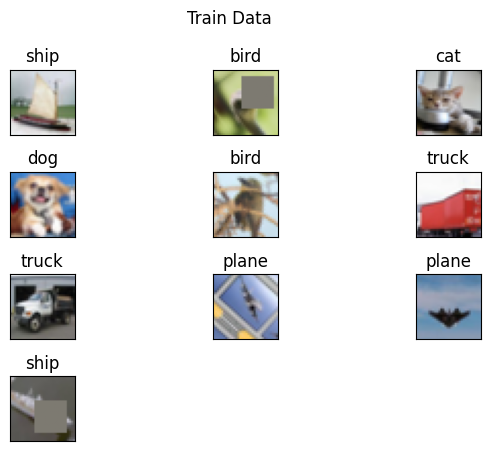

In [8]:
# getSampleImages(train_loader, num_images = 10) # Need to fix this function as it can take a maximum of 12 images only

# classes needs to be listed using cifar10.classes
getSampleImages(
    train_loader,
    10,
    "Train Data",
    classes=['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

# Model Params

In [9]:
from model_AC import Net # Instead of import * because Net is in a conflict with something else,

model = Net().to(device)
getModelSummary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
            Conv2d-4           [-1, 32, 32, 32]           9,216
              ReLU-5           [-1, 32, 32, 32]               0
       BatchNorm2d-6           [-1, 32, 32, 32]              64
            Conv2d-7           [-1, 32, 16, 16]           9,216
              ReLU-8           [-1, 32, 16, 16]               0
       BatchNorm2d-9           [-1, 32, 16, 16]              64
           Conv2d-10           [-1, 32, 16, 16]           9,216
             ReLU-11           [-1, 32, 16, 16]               0
      BatchNorm2d-12           [-1, 32, 16, 16]              64
           Conv2d-13           [-1, 32, 16, 16]           9,216
             ReLU-14           [-1, 32,

# Training and Testing

In [10]:
from torch.optim.lr_scheduler import StepLR

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = F.nll_loss
# scheduler = StepLR(optimizer, step_size=5, gamma=0.1)
num_epochs = 40

train_losses, test_losses, train_acc, test_acc = training(model, device, num_epochs, train_loader, test_loader, optimizer, criterion, scheduler=None)

Epoch 1


Train: Loss=1.4490 Batch_id=390 Accuracy=36.27: 100%|██████████| 391/391 [00:28<00:00, 13.69it/s]


Test set: Average loss: 1.4530, Accuracy: 4659/10000 (46.59%)

Epoch 2


Train: Loss=1.1896 Batch_id=390 Accuracy=46.99: 100%|██████████| 391/391 [00:28<00:00, 13.94it/s]


Test set: Average loss: 1.2543, Accuracy: 5496/10000 (54.96%)

Epoch 3


Train: Loss=1.3528 Batch_id=390 Accuracy=51.94: 100%|██████████| 391/391 [00:29<00:00, 13.27it/s]


Test set: Average loss: 1.1428, Accuracy: 5915/10000 (59.15%)

Epoch 4


Train: Loss=1.3560 Batch_id=390 Accuracy=55.48: 100%|██████████| 391/391 [00:28<00:00, 13.68it/s]


Test set: Average loss: 1.0306, Accuracy: 6346/10000 (63.46%)

Epoch 5


Train: Loss=1.1870 Batch_id=390 Accuracy=58.04: 100%|██████████| 391/391 [00:28<00:00, 13.91it/s]


Test set: Average loss: 0.9236, Accuracy: 6727/10000 (67.27%)

Epoch 6


Train: Loss=1.2844 Batch_id=390 Accuracy=60.44: 100%|██████████| 391/391 [00:28<00:00, 13.88it/s]


Test set: Average loss: 0.8782, Accuracy: 6938/10000 (69.38%)

Epoch 7


Train: Loss=1.0046 Batch_id=390 Accuracy=62.23: 100%|██████████| 391/391 [00:31<00:00, 12.55it/s]


Test set: Average loss: 0.8605, Accuracy: 6939/10000 (69.39%)

Epoch 8


Train: Loss=0.8588 Batch_id=390 Accuracy=63.77: 100%|██████████| 391/391 [00:29<00:00, 13.18it/s]


Test set: Average loss: 0.7820, Accuracy: 7279/10000 (72.79%)

Epoch 9


Train: Loss=1.0004 Batch_id=390 Accuracy=64.71: 100%|██████████| 391/391 [00:29<00:00, 13.13it/s]


Test set: Average loss: 0.7657, Accuracy: 7328/10000 (73.28%)

Epoch 10


Train: Loss=0.7905 Batch_id=390 Accuracy=65.51: 100%|██████████| 391/391 [00:29<00:00, 13.09it/s]


Test set: Average loss: 0.7466, Accuracy: 7434/10000 (74.34%)

Epoch 11


Train: Loss=1.0087 Batch_id=390 Accuracy=66.89: 100%|██████████| 391/391 [00:29<00:00, 13.12it/s]


Test set: Average loss: 0.7860, Accuracy: 7345/10000 (73.45%)

Epoch 12


Train: Loss=0.9659 Batch_id=390 Accuracy=67.60: 100%|██████████| 391/391 [00:29<00:00, 13.07it/s]


Test set: Average loss: 0.7274, Accuracy: 7467/10000 (74.67%)

Epoch 13


Train: Loss=0.9191 Batch_id=390 Accuracy=68.19: 100%|██████████| 391/391 [00:29<00:00, 13.08it/s]


Test set: Average loss: 0.6920, Accuracy: 7643/10000 (76.43%)

Epoch 14


Train: Loss=0.8678 Batch_id=390 Accuracy=68.57: 100%|██████████| 391/391 [00:32<00:00, 12.05it/s]


Test set: Average loss: 0.6819, Accuracy: 7649/10000 (76.49%)

Epoch 15


Train: Loss=0.8467 Batch_id=390 Accuracy=69.06: 100%|██████████| 391/391 [00:29<00:00, 13.25it/s]


Test set: Average loss: 0.6808, Accuracy: 7691/10000 (76.91%)

Epoch 16


Train: Loss=0.9716 Batch_id=390 Accuracy=69.50: 100%|██████████| 391/391 [00:29<00:00, 13.22it/s]


Test set: Average loss: 0.6585, Accuracy: 7717/10000 (77.17%)

Epoch 17


Train: Loss=0.8218 Batch_id=390 Accuracy=69.99: 100%|██████████| 391/391 [00:29<00:00, 13.20it/s]


Test set: Average loss: 0.6496, Accuracy: 7766/10000 (77.66%)

Epoch 18


Train: Loss=0.8748 Batch_id=390 Accuracy=70.91: 100%|██████████| 391/391 [00:29<00:00, 13.48it/s]


Test set: Average loss: 0.6235, Accuracy: 7837/10000 (78.37%)

Epoch 19


Train: Loss=1.0140 Batch_id=390 Accuracy=70.92: 100%|██████████| 391/391 [00:29<00:00, 13.47it/s]


Test set: Average loss: 0.6326, Accuracy: 7819/10000 (78.19%)

Epoch 20


Train: Loss=0.8050 Batch_id=390 Accuracy=71.24: 100%|██████████| 391/391 [00:29<00:00, 13.44it/s]


Test set: Average loss: 0.6232, Accuracy: 7838/10000 (78.38%)

Epoch 21


Train: Loss=0.7010 Batch_id=390 Accuracy=71.44: 100%|██████████| 391/391 [00:29<00:00, 13.26it/s]


Test set: Average loss: 0.6113, Accuracy: 7933/10000 (79.33%)

Epoch 22


Train: Loss=0.8163 Batch_id=390 Accuracy=71.90: 100%|██████████| 391/391 [00:31<00:00, 12.28it/s]


Test set: Average loss: 0.6079, Accuracy: 7904/10000 (79.04%)

Epoch 23


Train: Loss=0.7213 Batch_id=390 Accuracy=71.99: 100%|██████████| 391/391 [00:28<00:00, 13.60it/s]


Test set: Average loss: 0.6103, Accuracy: 7893/10000 (78.93%)

Epoch 24


Train: Loss=0.6287 Batch_id=390 Accuracy=72.66: 100%|██████████| 391/391 [00:29<00:00, 13.27it/s]


Test set: Average loss: 0.5942, Accuracy: 7982/10000 (79.82%)

Epoch 25


Train: Loss=0.8709 Batch_id=390 Accuracy=72.72: 100%|██████████| 391/391 [00:29<00:00, 13.31it/s]


Test set: Average loss: 0.5850, Accuracy: 7986/10000 (79.86%)

Epoch 26


Train: Loss=0.9703 Batch_id=390 Accuracy=72.69: 100%|██████████| 391/391 [00:29<00:00, 13.24it/s]


Test set: Average loss: 0.5735, Accuracy: 8028/10000 (80.28%)

Epoch 27


Train: Loss=0.9548 Batch_id=390 Accuracy=73.22: 100%|██████████| 391/391 [00:29<00:00, 13.20it/s]


Test set: Average loss: 0.5882, Accuracy: 7979/10000 (79.79%)

Epoch 28


Train: Loss=0.6751 Batch_id=390 Accuracy=73.34: 100%|██████████| 391/391 [00:31<00:00, 12.40it/s]


Test set: Average loss: 0.5624, Accuracy: 8068/10000 (80.68%)

Epoch 29


Train: Loss=0.7615 Batch_id=390 Accuracy=73.47: 100%|██████████| 391/391 [00:33<00:00, 11.79it/s]


Test set: Average loss: 0.5587, Accuracy: 8087/10000 (80.87%)

Epoch 30


Train: Loss=0.5819 Batch_id=390 Accuracy=73.55: 100%|██████████| 391/391 [00:29<00:00, 13.04it/s]


Test set: Average loss: 0.5643, Accuracy: 8096/10000 (80.96%)

Epoch 31


Train: Loss=0.6932 Batch_id=390 Accuracy=74.00: 100%|██████████| 391/391 [00:29<00:00, 13.06it/s]


Test set: Average loss: 0.5516, Accuracy: 8135/10000 (81.35%)

Epoch 32


Train: Loss=0.7349 Batch_id=390 Accuracy=74.06: 100%|██████████| 391/391 [00:30<00:00, 12.80it/s]


Test set: Average loss: 0.5631, Accuracy: 8104/10000 (81.04%)

Epoch 33


Train: Loss=0.6324 Batch_id=390 Accuracy=74.66: 100%|██████████| 391/391 [00:29<00:00, 13.17it/s]


Test set: Average loss: 0.5678, Accuracy: 8044/10000 (80.44%)

Epoch 34


Train: Loss=0.7277 Batch_id=390 Accuracy=74.26: 100%|██████████| 391/391 [00:29<00:00, 13.12it/s]


Test set: Average loss: 0.5434, Accuracy: 8150/10000 (81.50%)

Epoch 35


Train: Loss=0.6618 Batch_id=390 Accuracy=74.83: 100%|██████████| 391/391 [00:29<00:00, 13.31it/s]


Test set: Average loss: 0.5331, Accuracy: 8196/10000 (81.96%)

Epoch 36


Train: Loss=0.8535 Batch_id=390 Accuracy=74.79: 100%|██████████| 391/391 [00:29<00:00, 13.19it/s]


Test set: Average loss: 0.5317, Accuracy: 8209/10000 (82.09%)

Epoch 37


Train: Loss=0.6205 Batch_id=390 Accuracy=75.20: 100%|██████████| 391/391 [00:31<00:00, 12.31it/s]


Test set: Average loss: 0.5383, Accuracy: 8165/10000 (81.65%)

Epoch 38


Train: Loss=0.7004 Batch_id=390 Accuracy=75.27: 100%|██████████| 391/391 [00:28<00:00, 13.61it/s]


Test set: Average loss: 0.5365, Accuracy: 8209/10000 (82.09%)

Epoch 39


Train: Loss=0.6462 Batch_id=390 Accuracy=74.90: 100%|██████████| 391/391 [00:28<00:00, 13.55it/s]


Test set: Average loss: 0.5267, Accuracy: 8172/10000 (81.72%)

Epoch 40


Train: Loss=0.6895 Batch_id=390 Accuracy=75.30: 100%|██████████| 391/391 [00:28<00:00, 13.71it/s]


Test set: Average loss: 0.5383, Accuracy: 8180/10000 (81.80%)



# Graphs

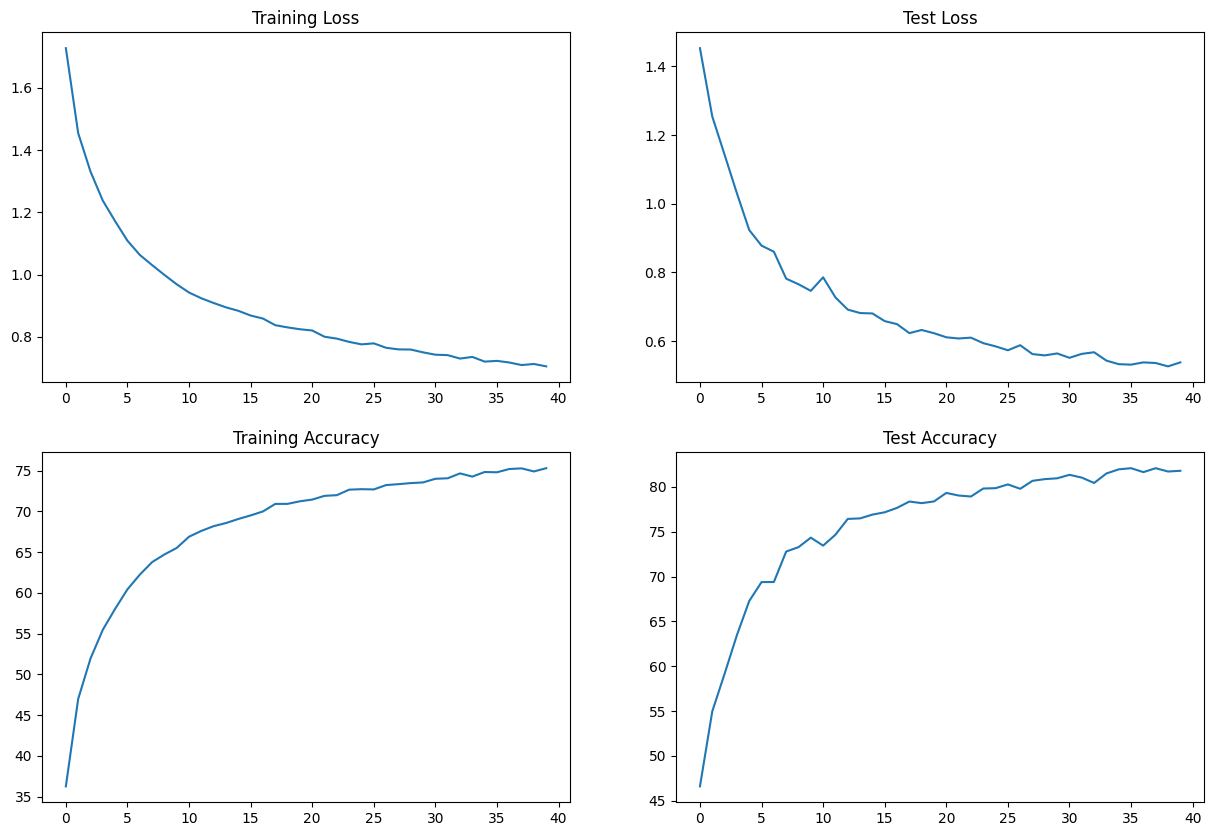

In [11]:
getTrainingTestPlots(train_losses, test_losses, train_acc, test_acc)

#  Misclassified images

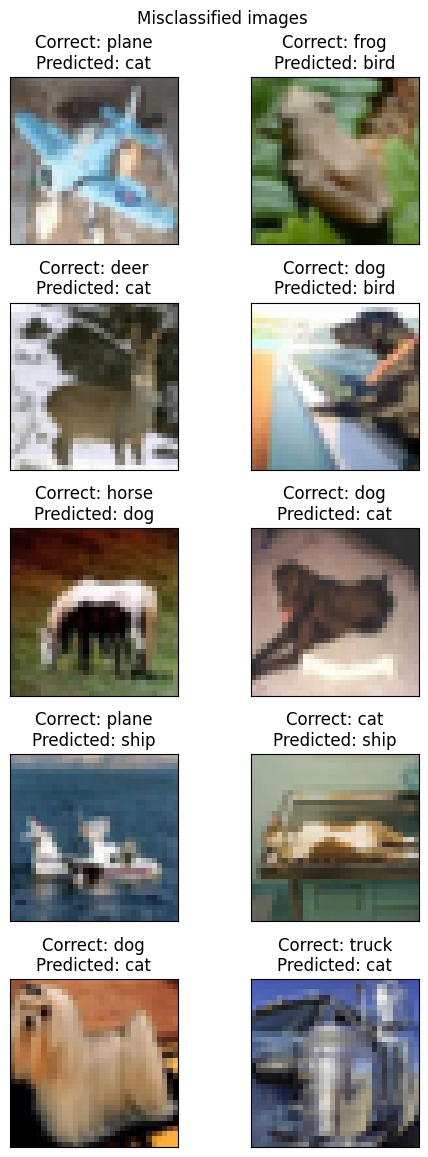

In [12]:
plot_misclassified_images(model, test_loader, ['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], device)